# Validation using DIGEST

Notebook to recreate the results presented in the paper.

## Setup

In [1]:
import os
import sys
import json
import math
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
plt.rcParams.update({'font.size': 17})
# ==== import single validation script ====
from pathlib import Path
sys.path.append(str(Path.cwd().parent))
from single_validation import single_validation

/home/kikky/.local/lib/python3.8/site-packages/scipy/sparse/sputils.py:114: UserWarning: object dtype is not supported by sparse matrices
  warnings.warn("object dtype is not supported by sparse matrices")
/home/kikky/.local/lib/python3.8/site-packages/scipy/sparse/sputils.py:114: UserWarning: object dtype is not supported by sparse matrices
  warnings.warn("object dtype is not supported by sparse matrices")


## Cluster itself

Compare a target cluster of diseases based on dunn index and sillhouette score, while the random runs are simply cluster size preserving perturbation of cluster assignments.

## Gene Cluster

### Cluster input parameters

In [11]:
tar_set = "input/target_gene_cluster.txt"
tar_id_type = "symbol"
mode = "cluster"
out_dir = "results/"
runs = 1000
perc = 100
background_model="complete"

### Run script

In [12]:
single_validation(tar=tar_set, tar_id=tar_id_type, mode=mode, out_dir=out_dir, runs=runs, replace=perc, verbose=True)

[00:00:00|2399.30MB] Starting validation ...
[00:00:00|2399.30MB] Load mappings for input into cache ...
[00:00:01|2399.49MB] Load distances for input into cache ...
[00:00:08|2460.23MB] Load input data ...
[00:00:09|2460.23MB] Validation of input ...
Missing values for pathway.kegg :9/20
[00:00:09|2460.23MB] Validation of random runs ...


KeyboardInterrupt: 

### Inspect results

In [13]:
with open(out_dir+'digest_'+mode+'_'+tar_id_type+'_result.json', 'r') as f:
    results = json.load(f)

Check all P-values

In [14]:
pd.DataFrame(results["p_values"])

,di,ss,dbi
go.BP,0.051948,0.355644,0.143856
go.CC,0.368631,1.000000,0.792208
go.MF,0.398601,1.000000,0.769231
pathway.kegg,0.328671,1.000000,0.707293


Check validation values of input cluster

In [15]:
pd.DataFrame(results["input_values"])

,di,ss,ss_inter,dbi,mapped_ids
go.BP,0.097523,-0.700000,"{'0': -0.6, '1': -0.8}",0.180988,"[AGR2, AR, CLSTN2, COL9A3, DNAH7, EGFR, ERBB4,..."
go.CC,0.181698,-1.000000,"{'1': -1.0, '0': -1.0}",1.835614,"[AGR2, AR, CLSTN2, COL9A3, DNAH7, EGFR, ERBB4,..."
go.MF,0.184877,-0.900000,"{'0': -0.8, '1': -1.0}",1.962328,"[AGR2, AR, CLSTN2, COL9A3, DNAH7, EGFR, ERBB4,..."
pathway.kegg,0.279293,-0.909091,"{'0': -0.8, '1': -1.0}",0.275175,"[AR, COL9A3, DNAH7, EGFR, ERBB4, ESR1, KRT16, ..."


Create visualization

In [16]:
# prepare for scatterplot
df = pd.DataFrame.from_dict(results["p_values"])
df = df.rename_axis('attribute').reset_index()
df["log_di"] = df["di"].apply(lambda x: -math.log10(x))
df = df.replace({"go.BP": "GO.BP", "go.CC": "GO.CC", "go.MF": "GO.MF", "pathway.kegg": "KEGG"})
# prepare for mappibility plot
in_put = pd.read_csv(tar_set, sep="\t", names=["id","cluster"])
mapped_df = in_put.copy()
for att in results["input_values"]["mapped_ids"]:
    mapped_df[att] = [1 if x in results["input_values"]["mapped_ids"][att] else 0 for x in in_put["id"]]
mapped_df = mapped_df.groupby("cluster", as_index = False).agg(sum).melt('cluster', var_name='att', value_name='count')
mapped_df = mapped_df.replace({"go.BP": "GO.BP", "go.CC": "GO.CC", "go.MF": "GO.MF", "pathway.kegg": "KEGG"})
cluster_sizes = in_put["cluster"].value_counts().to_dict()
mapped_df["fraction"] = mapped_df.apply(lambda x: x['count']/cluster_sizes[x['cluster']], axis=1)

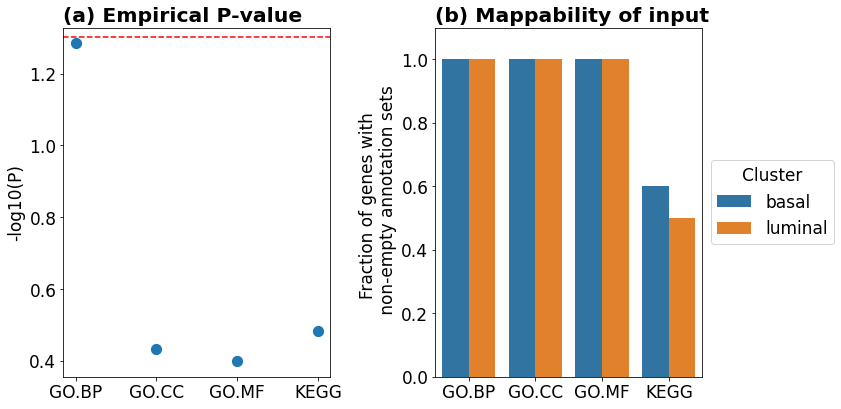

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(12,6))
sns.scatterplot(x=df['attribute'], y=df['log_di'], s=150, ax=axes[0])
axes[0].set_title("(a) Empirical P-value", loc="left", weight='bold')
axes[0].set(ylabel="-log10(P)", xlabel="")
axes[0].axhline(y=-math.log10(0.05), color="red",linestyle='--')
sns.barplot(x ="att", y = 'fraction', data = mapped_df, hue = "cluster", ax=axes[1])
axes[1].set_title("(b) Mappability of input", loc="left", weight='bold')
axes[1].set(xlabel="", ylabel="Fraction of genes with \n non-empty annotation sets", ylim=(0, 1.1))
axes[1].legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Cluster")
fig.tight_layout() 
fig.savefig(out_dir+'mode_'+mode+'_'+tar_id_type+'_overview.pdf', bbox_inches='tight')

## Disease Cluster

In [22]:
tar_set = "input/target_disease_cluster.txt"
tar_id_type = "ICD-10"
mode = "cluster"
out_dir = "results/"
runs = 1000
perc = 100

### Run script

In [49]:
single_validation(tar=tar_set, tar_id=tar_id_type, mode=mode, out_dir=out_dir, runs=runs, replace=perc, verbose=True)

[00:00:00|2710.40MB] Starting validation ...
[00:00:00|2710.40MB] Load mappings for input into cache ...
[00:00:01|2695.71MB] Load distances for input into cache ...
[00:00:02|2676.32MB] Load input data ...
[00:00:02|2676.32MB] Validation of input ...
Missing values for disgenet.genes_related_to_disease :2/64
Missing values for disgenet.variants_related_to_disease :7/64
Missing values for ctd.pathway_related_to_disease :18/64
[00:00:03|2680.18MB] Validation of random runs ...
[00:21:51|2687.17MB] Save files
[00:21:51|2687.17MB] Finished validation


### Inspect results

In [23]:
with open(out_dir+'digest_'+mode+'_'+tar_id_type+'_result.json', 'r') as f:
    results = json.load(f)

Check all P-values

In [24]:
pd.DataFrame(results["p_values"])

,di,ss,dbi
disgenet.genes_related_to_disease,0.167832,0.525475,0.170829
disgenet.variants_related_to_disease,0.181818,0.045954,0.889111
ctd.pathway_related_to_disease,0.127872,0.393606,0.119880


Check validation values of input cluster

In [25]:
pd.DataFrame(results["input_values"])

,di,ss,ss_inter,dbi,mapped_ids
disgenet.genes_related_to_disease,0.000348,-0.990557,"{'5': -0.9862193242257938, '8': -1.0, '0': -1....",755.463846,"[I00, I01, I02, I05, I06, I09, I10, I11, I12, ..."
disgenet.variants_related_to_disease,0.000000,-0.592513,"{'5': -0.7088569291512603, '8': -0.32997753713...",7228.265956,"[I00, I01, I02, I05, I06, I09, I10, I11, I12, ..."
ctd.pathway_related_to_disease,0.001232,-0.881844,"{'5': -1.0, '0': 0.0, '6': -1.0, '3': -1.0, '1...",113.206978,"[I00, I06, I10, I11, I12, I13, I14, I15, I20, ..."


Create visualization

In [34]:
# prepare for scatterplot
df = pd.DataFrame.from_dict(results["p_values"])
df = df.rename_axis('attribute').reset_index()
df["log_di"] = df["di"].apply(lambda x: -math.log10(x))
df = df.replace({"disgenet.genes_related_to_disease":"related\ngenes", "disgenet.variants_related_to_disease":"related\nvariants", "ctd.pathway_related_to_disease":"KEGG"})
# prepare for mappibility plot
in_put = pd.read_csv(tar_set, sep="\t", names=["id","cluster","desc"])
mapped_df = in_put.copy()
for att in results["input_values"]["mapped_ids"]:
    mapped_df[att] = [1 if x in results["input_values"]["mapped_ids"][att] else 0 for x in in_put["id"]]
mapped_df = mapped_df.groupby("cluster", as_index = False).agg(sum).melt('cluster', var_name='att', value_name='count')
mapped_df = mapped_df.replace({"disgenet.genes_related_to_disease":"related\ngenes", "disgenet.variants_related_to_disease":"related\nvariants", "ctd.pathway_related_to_disease":"KEGG"})
cluster_sizes = in_put["cluster"].value_counts().to_dict()
mapped_df["fraction"] = mapped_df.apply(lambda x: x['count']/cluster_sizes[x['cluster']], axis=1)

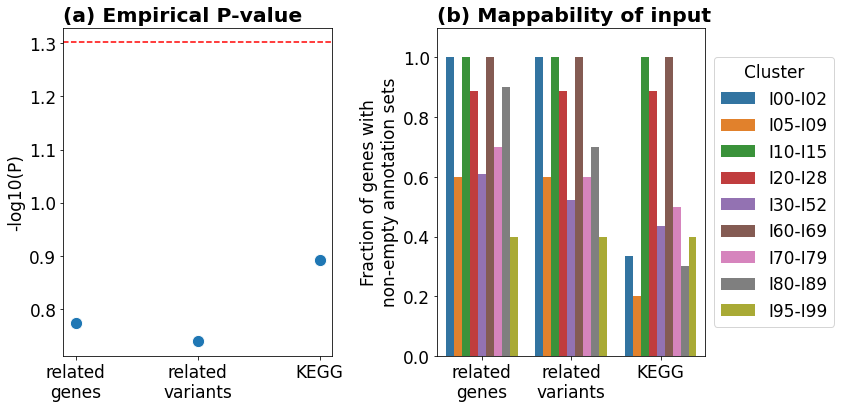

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(12,6))
sns.scatterplot(x=df['attribute'], y=df['log_di'], s=150, ax=axes[0])
axes[0].set_title("(a) Empirical P-value", loc="left", weight='bold')
axes[0].set(ylabel="-log10(P)", xlabel="")
axes[0].axhline(y=-math.log10(0.05), color="red",linestyle='--')
sns.barplot(x ="att", y = 'fraction', data = mapped_df, hue = "cluster", ax=axes[1])
axes[1].set_title("(b) Mappability of input", loc="left", weight='bold')
axes[1].set(xlabel="", ylabel="Fraction of genes with\nnon-empty annotation sets", ylim=(0, 1.1))
axes[1].legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Cluster")
fig.tight_layout() 
fig.savefig(out_dir+'mode_'+mode+'_'+tar_id_type+'_overview.pdf', bbox_inches='tight')

## Set itself

Compare a target set in itself.

## Disease Set

### Set input parameters

In [2]:
tar_set = "input/target_disease_set.txt"
tar_id_type = "mesh"
mode = "set"
out_dir = "results/"
runs = 1000
background_model="complete"

### Run script

In [3]:
single_validation(tar=tar_set, tar_id=tar_id_type, mode=mode, out_dir=out_dir, runs=runs, background_model=background_model, verbose=True)

[00:00:00|152.74MB] Starting validation ...
[00:00:00|152.74MB] Load mappings for input into cache ...
[00:00:01|592.65MB] Load distances for input into cache ...
[00:00:02|798.44MB] Validation of input ...
[00:00:02|798.44MB] Validation of random runs ...
[00:00:27|800.08MB] Calculating p-values ...
[00:00:27|800.08MB] Save files
[00:00:27|800.08MB] Finished validation


### Inspect results

In [6]:
with open(out_dir+'digest_'+mode+'_'+tar_id_type+'_result.json', 'r') as f:
    data = json.load(f)

In [7]:
# prepare scatter
data_df = data.copy()
data_df = pd.DataFrame.from_dict({'p_values':data_df["p_values"]})
data_df = data_df.rename_axis('attribute').reset_index()
data_df["log_p-values"] = data_df["p_values"].apply(lambda x: -math.log10(x))
data_df = data_df.replace({"disgenet.genes_related_to_disease":"related genes", "disgenet.variants_related_to_disease":"related variants", "ctd.pathway_related_to_disease":"KEGG"})
data_df = data_df.sort_values(['attribute']).reset_index(drop=True)
# prepare for mappibility plot
in_put = pd.read_csv(tar_set, sep="\t", names=["id", "desc"])
mapped_df = in_put.copy()
for att in data["input_values"]["mapped_ids"]:
    mapped_df[att] = [1 if x in data["input_values"]["mapped_ids"][att] else 0 for x in in_put["id"]]
mapped_df= mapped_df[["disgenet.genes_related_to_disease", "disgenet.variants_related_to_disease", "ctd.pathway_related_to_disease"]].T
mapped_df["count"] = mapped_df.sum(axis=1)
mapped_df["fraction"] = mapped_df['count'].apply(lambda x: x/len(in_put["id"]))
mapped_df = mapped_df.rename_axis('attribute').reset_index()
mapped_df = mapped_df.replace({"disgenet.genes_related_to_disease":"related genes", "disgenet.variants_related_to_disease":"related variants", "ctd.pathway_related_to_disease":"KEGG"})
mapped_df = mapped_df.sort_values(['attribute']).reset_index(drop=True)

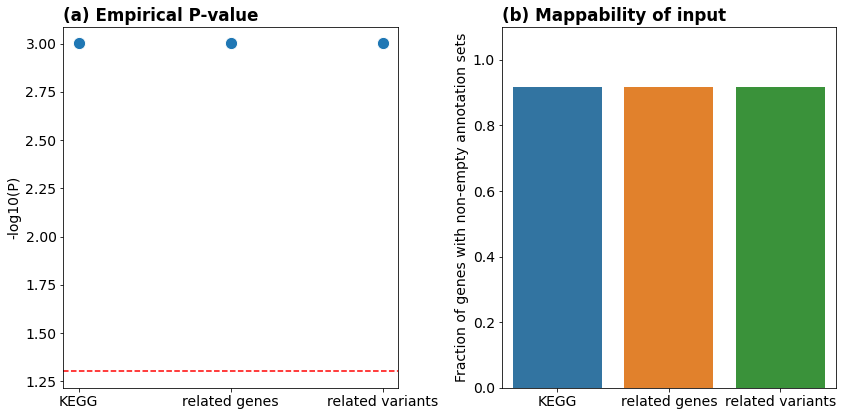

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(12,6))
sns.scatterplot(x=data_df['attribute'], y=data_df['log_p-values'], s=150, ax=axes[0])
axes[0].set_title("(a) Empirical P-value", loc="left", weight='bold')
axes[0].set(ylabel="-log10(P)", xlabel="")
axes[0].axhline(y=-math.log10(0.05), color="red",linestyle='--')
sns.barplot(x ="attribute", y = 'fraction', data = mapped_df, ax=axes[1])
axes[1].set_title("(b) Mappability of input", loc="left", weight='bold')
axes[1].set(xlabel="", ylabel="Fraction of genes with non-empty annotation sets", ylim=(0, 1.1))
fig.tight_layout() 
fig.savefig('mode_'+mode+'_'+tar_id_type+'_uniform_overview.pdf', bbox_inches='tight')

In [16]:
tar_set = "input/target_disease_set.txt"
tar_id_type = "mesh"
mode = "set"
out_dir = "results/"
runs = 1000
background_model="term-pres"

### Run script

In [17]:
single_validation(tar=tar_set, tar_id=tar_id_type, mode=mode, out_dir=out_dir, runs=runs, background_model=background_model, verbose=True)

[00:00:00|889.98MB] Starting validation ...
[00:00:00|889.98MB] Load mappings for input into cache ...
[00:00:01|908.76MB] Load distances for input into cache ...
[00:00:02|846.12MB] Validation of input ...
[00:00:02|846.12MB] Validation of random runs ...
[00:00:40|847.18MB] Calculating p-values ...
[00:00:40|847.18MB] Save files
[00:00:40|847.18MB] Finished validation


### Inspect results

In [18]:
with open(out_dir+'digest_'+mode+'_'+tar_id_type+'_result.json', 'r') as f:
    data = json.load(f)

In [156]:
# prepare scatter
data_df = data.copy()
data_df = pd.DataFrame.from_dict({'p_values':data_df["p_values"]})
data_df = data_df.rename_axis('attribute').reset_index()
data_df["log_p-values"] = data_df["p_values"].apply(lambda x: -math.log10(x))
data_df = data_df.replace({"disgenet.genes_related_to_disease":"related genes", "disgenet.variants_related_to_disease":"related variants", "ctd.pathway_related_to_disease":"KEGG"})
data_df = data_df.sort_values(['attribute']).reset_index(drop=True)
# prepare for mappibility plot
in_put = pd.read_csv(tar_set, sep="\t", names=["id", "desc"])
mapped_df = in_put.copy()
for att in data["input_values"]["mapped_ids"]:
    mapped_df[att] = [1 if x in data["input_values"]["mapped_ids"][att] else 0 for x in in_put["id"]]
mapped_df= mapped_df[["disgenet.genes_related_to_disease", "disgenet.variants_related_to_disease", "ctd.pathway_related_to_disease"]].T
mapped_df["count"] = mapped_df.sum(axis=1)
mapped_df["fraction"] = mapped_df['count'].apply(lambda x: x/len(in_put["id"]))
mapped_df = mapped_df.rename_axis('attribute').reset_index()
mapped_df = mapped_df.replace({"disgenet.genes_related_to_disease":"related genes", "disgenet.variants_related_to_disease":"related variants", "ctd.pathway_related_to_disease":"KEGG"})
mapped_df = mapped_df.sort_values(['attribute']).reset_index(drop=True)

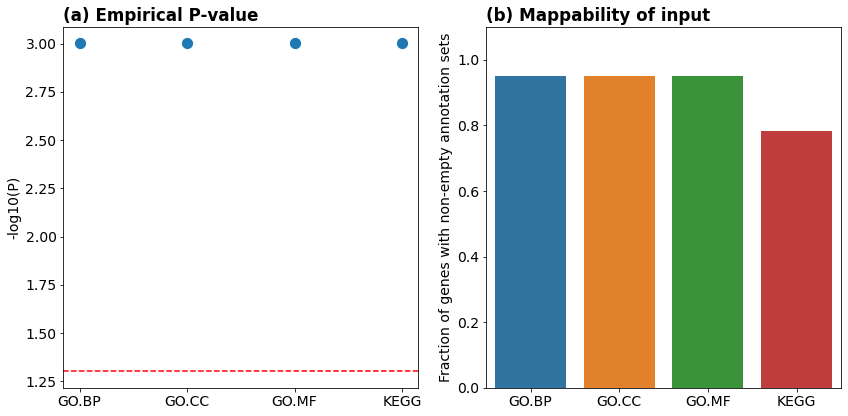

In [157]:
fig, axes = plt.subplots(1, 2, figsize=(12,6))
sns.scatterplot(x=data_df['attribute'], y=data_df['log_p-values'], s=150, ax=axes[0])
axes[0].set_title("(a) Empirical P-value", loc="left", weight='bold')
axes[0].set(ylabel="-log10(P)", xlabel="")
axes[0].axhline(y=-math.log10(0.05), color="red",linestyle='--')
sns.barplot(x ="attribute", y = 'fraction', data = mapped_df, ax=axes[1])
axes[1].set_title("(b) Mappability of input", loc="left", weight='bold')
axes[1].set(xlabel="", ylabel="Fraction of genes with non-empty annotation sets", ylim=(0, 1.1))
fig.tight_layout() 
fig.savefig('mode_'+mode+'_'+tar_id_type+'_term-pres_overview.pdf', bbox_inches='tight')

## Gene Set

### Set input parameters

In [7]:
tar_set = "input/target_gene_set.txt"
tar_id_type = "symbol"
ref_set = "input/reference_gene_set.txt"
ref_id_type = "symbol"
mode = "set-set"
out_dir = "results/"
runs = 1000
background_model="term-pres"

### Run script

In [8]:
single_validation(tar=tar_set, tar_id=tar_id_type, ref=ref_set, ref_id=ref_id_type, mode=mode, out_dir=out_dir, runs=runs, background_model=background_model, verbose=True)

[00:00:00|598.91MB] Starting validation ...
[00:00:00|598.91MB] Load mappings for input into cache ...
[00:00:01|641.05MB] Validation of input ...
[00:00:01|641.05MB] Validation of random runs ...
[00:01:38|642.24MB] Calculating p-values ...
[00:01:38|642.24MB] Save files
[00:01:38|642.24MB] Finished validation


### Inspect results

In [9]:
with open(out_dir+'digest_'+mode+'_'+tar_id_type+'_result.json', 'r') as f:
    data = json.load(f)

In [10]:
# prepare scatter
data_df = data.copy()
data_df = pd.DataFrame.from_dict({'p_values':data_df["p_values"]})
data_df = data_df.rename_axis('attribute').reset_index()
data_df["log_p-values"] = data_df["p_values"].apply(lambda x: -math.log10(x))
data_df = data_df.replace({"go.BP": "GO.BP", "go.CC": "GO.CC", "go.MF": "GO.MF", "pathway.kegg": "KEGG"})
data_df = data_df.sort_values(['attribute']).reset_index(drop=True)
# prepare for mappibility plot
in_put = pd.read_csv(tar_set, sep="\t", names=["id", "desc"], dtype="str")
mapped_df = in_put.copy()
for att in data["input_values"]["mapped_ids"]:
    mapped_df[att] = [1 if x in data["input_values"]["mapped_ids"][att] else 0 for x in in_put["id"]]
mapped_df= mapped_df[["go.BP", "go.CC", "go.MF","pathway.kegg"]].T
mapped_df["count"] = mapped_df.sum(axis=1)
mapped_df["fraction"] = mapped_df['count'].apply(lambda x: x/len(in_put["id"]))
mapped_df = mapped_df.rename_axis('attribute').reset_index()
mapped_df = mapped_df.replace({"go.BP": "GO.BP", "go.CC": "GO.CC", "go.MF": "GO.MF", "pathway.kegg": "KEGG"})
mapped_df = mapped_df.sort_values(['attribute']).reset_index(drop=True)

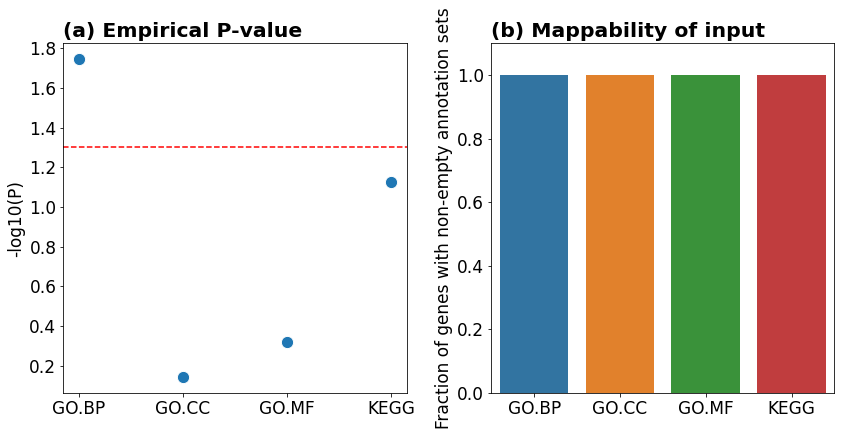

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(12,6))
sns.scatterplot(x=data_df['attribute'], y=data_df['log_p-values'], s=150, ax=axes[0])
axes[0].set_title("(a) Empirical P-value", loc="left", weight='bold')
axes[0].set(ylabel="-log10(P)", xlabel="")
axes[0].axhline(y=-math.log10(0.05), color="red",linestyle='--')
sns.barplot(x ="attribute", y = 'fraction', data = mapped_df, ax=axes[1])
axes[1].set_title("(b) Mappability of input", loc="left", weight='bold')
axes[1].set(xlabel="", ylabel="Fraction of genes with\nnon-empty annotation sets", ylim=(0, 1.1))
fig.tight_layout() 
fig.savefig(out_dir+'mode_'+mode+'_'+tar_id_type+'_term-pres_overview.pdf', bbox_inches='tight')

In [13]:
tar_set = "input/target_gene_set.txt"
tar_id_type = "symbol"
ref_set = "input/reference_gene_set.txt"
ref_id_type = "symbol"
mode = "set-set"
out_dir = "results/"
enriched=True
runs = 1000
background_model="term-pres"

### Run script

In [14]:
single_validation(tar=tar_set, tar_id=tar_id_type, ref=ref_set, ref_id=ref_id_type, mode=mode, out_dir=out_dir, runs=runs, background_model=background_model, verbose=True, enriched=enriched)

[00:00:00|642.24MB] Starting validation ...
[00:00:00|642.24MB] Load mappings for input into cache ...
[00:00:18|646.04MB] Validation of input ...
[00:00:18|646.04MB] Validation of random runs ...
[00:02:02|646.79MB] Calculating p-values ...
[00:02:02|646.79MB] Save files
[00:02:02|646.79MB] Finished validation


### Inspect results

In [15]:
with open(out_dir+'digest_'+mode+'_'+tar_id_type+'_result.json', 'r') as f:
    data = json.load(f)

In [16]:
# prepare scatter
data_df = data.copy()
data_df = pd.DataFrame.from_dict({'p_values':data_df["p_values"]})
data_df = data_df.rename_axis('attribute').reset_index()
data_df["log_p-values"] = data_df["p_values"].apply(lambda x: -math.log10(x))
data_df = data_df.replace({"go.BP": "GO.BP", "go.CC": "GO.CC", "go.MF": "GO.MF", "pathway.kegg": "KEGG"})
data_df = data_df.sort_values(['attribute']).reset_index(drop=True)
# prepare for mappibility plot
in_put = pd.read_csv(tar_set, sep="\t", names=["id", "desc"], dtype="str")
mapped_df = in_put.copy()
for att in data["input_values"]["mapped_ids"]:
    mapped_df[att] = [1 if x in data["input_values"]["mapped_ids"][att] else 0 for x in in_put["id"]]
mapped_df= mapped_df[["go.BP", "go.CC", "go.MF","pathway.kegg"]].T
mapped_df["count"] = mapped_df.sum(axis=1)
mapped_df["fraction"] = mapped_df['count'].apply(lambda x: x/len(in_put["id"]))
mapped_df = mapped_df.rename_axis('attribute').reset_index()
mapped_df = mapped_df.replace({"go.BP": "GO.BP", "go.CC": "GO.CC", "go.MF": "GO.MF", "pathway.kegg": "KEGG"})
mapped_df = mapped_df.sort_values(['attribute']).reset_index(drop=True)

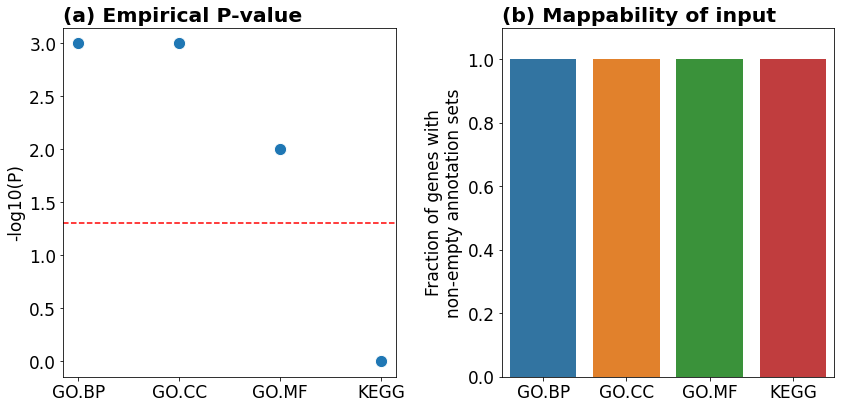

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(12,6))
sns.scatterplot(x=data_df['attribute'], y=data_df['log_p-values'], s=150, ax=axes[0])
axes[0].set_title("(a) Empirical P-value", loc="left", weight='bold')
axes[0].set(ylabel="-log10(P)", xlabel="")
axes[0].axhline(y=-math.log10(0.05), color="red",linestyle='--')
sns.barplot(x ="attribute", y = 'fraction', data = mapped_df, ax=axes[1])
axes[1].set_title("(b) Mappability of input", loc="left", weight='bold')
axes[1].set(xlabel="", ylabel="Fraction of genes with\nnon-empty annotation sets", ylim=(0, 1.1))
fig.tight_layout() 
fig.savefig(out_dir+'mode_'+mode+'_'+tar_id_type+'_term-pres_enriched_overview.pdf', bbox_inches='tight')

In [16]:
tar_set = "input/target_disease_set.txt"
tar_id_type = "mesh"
mode = "set"
out_dir = "results/"
runs = 1000
background_model="term-pres"

### Run script

In [17]:
single_validation(tar=tar_set, tar_id=tar_id_type, mode=mode, out_dir=out_dir, runs=runs, background_model=background_model, verbose=True)

[00:00:00|889.98MB] Starting validation ...
[00:00:00|889.98MB] Load mappings for input into cache ...
[00:00:01|908.76MB] Load distances for input into cache ...
[00:00:02|846.12MB] Validation of input ...
[00:00:02|846.12MB] Validation of random runs ...
[00:00:40|847.18MB] Calculating p-values ...
[00:00:40|847.18MB] Save files
[00:00:40|847.18MB] Finished validation


### Inspect results

In [18]:
with open(out_dir+'digest_'+mode+'_'+tar_id_type+'_result.json', 'r') as f:
    data = json.load(f)

In [19]:
# prepare scatter
data_df = data.copy()
data_df = pd.DataFrame.from_dict({'p_values':data_df["p_values"]})
data_df = data_df.rename_axis('attribute').reset_index()
data_df["log_p-values"] = data_df["p_values"].apply(lambda x: -math.log10(x))
data_df = data_df.replace({"disgenet.genes_related_to_disease":"related genes", "disgenet.variants_related_to_disease":"related variants", "ctd.pathway_related_to_disease":"KEGG"})
data_df = data_df.sort_values(['attribute']).reset_index(drop=True)
# prepare for mappibility plot
in_put = pd.read_csv(tar_set, sep="\t", names=["id", "desc"])
mapped_df = in_put.copy()
for att in data["input_values"]["mapped_ids"]:
    mapped_df[att] = [1 if x in data["input_values"]["mapped_ids"][att] else 0 for x in in_put["id"]]
mapped_df= mapped_df[["disgenet.genes_related_to_disease", "disgenet.variants_related_to_disease", "ctd.pathway_related_to_disease"]].T
mapped_df["count"] = mapped_df.sum(axis=1)
mapped_df["fraction"] = mapped_df['count'].apply(lambda x: x/len(in_put["id"]))
mapped_df = mapped_df.rename_axis('attribute').reset_index()
mapped_df = mapped_df.replace({"disgenet.genes_related_to_disease":"related genes", "disgenet.variants_related_to_disease":"related variants", "ctd.pathway_related_to_disease":"KEGG"})
mapped_df = mapped_df.sort_values(['attribute']).reset_index(drop=True)

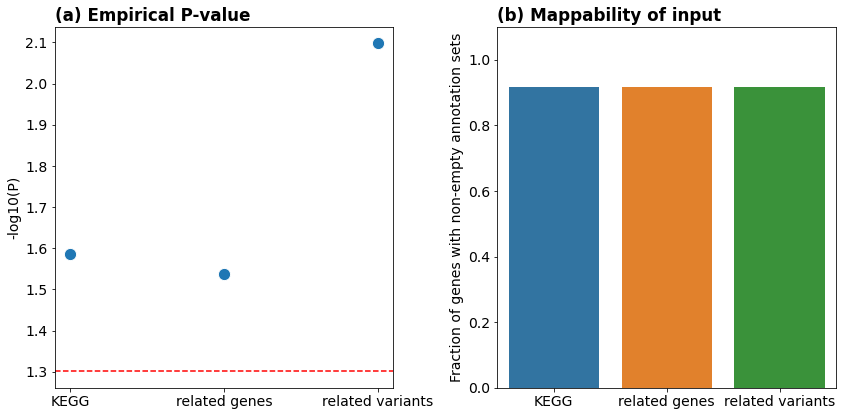

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(12,6))
sns.scatterplot(x=data_df['attribute'], y=data_df['log_p-values'], s=150, ax=axes[0])
axes[0].set_title("(a) Empirical P-value", loc="left", weight='bold')
axes[0].set(ylabel="-log10(P)", xlabel="")
axes[0].axhline(y=-math.log10(0.05), color="red",linestyle='--')
sns.barplot(x ="attribute", y = 'fraction', data = mapped_df, ax=axes[1])
axes[1].set_title("(b) Mappability of input", loc="left", weight='bold')
axes[1].set(xlabel="", ylabel="Fraction of genes with non-empty annotation sets", ylim=(0, 1.1))
fig.tight_layout() 
fig.savefig('mode_'+mode+'_'+tar_id_type+'_term-pres_overview.pdf', bbox_inches='tight')

In [ ]:
pd.read_csv("https://api.nedrex.net/disorder_is_subtype_of_disorder/all")

In [29]:
d_fin = pd.DataFrame(columns=["id","cluster","desc"])

In [45]:
d = pd.DataFrame(columns=["id","cluster","desc"])
d["id"] = ["I"+str(x).zfill(2) for x in list(range(95,100))]
d["cluster"] = "9"
d["desc"] = "Other and unspecified disorders of the circulatory system"
d_fin = pd.concat([d_fin, d])

In [46]:
d_fin

,id,cluster,desc
0,I00,0,Acute rheumatic fever
1,I01,0,Acute rheumatic fever
2,I02,0,Acute rheumatic fever
0,I05,1,Chronic rheumatic heart diseases
1,I06,1,Chronic rheumatic heart diseases
...,...,...,...
0,I95,9,Other and unspecified disorders of the circula...
1,I96,9,Other and unspecified disorders of the circula...
2,I97,9,Other and unspecified disorders of the circula...
3,I98,9,Other and unspecified disorders of the circula...


In [47]:
d_fin.to_csv("icd10_cluster.txt", sep="\t", index=False, header=False)

In [54]:
import graph_tool as gt
import graph_tool.draw as d

In [165]:
G = gt.load_graph_from_csv('edgelist.txt', skip_first=False, directed=False, hashed=True)

In [166]:
print(G.vp.keys())
print(G.ep.keys())
print([G.vp['name'][v] for v in G.get_vertices()])

<generator object PropertyDict.iterkeys at 0x7f3fbf29e9e0>
<generator object PropertyDict.iterkeys at 0x7f3fbf29e9e0>
['SHC4', 'EGFR', 'KRT16', 'COL9A3', 'ERBB4', 'ESR1', 'TFF1', 'PGR', 'DNAH7', 'FOXA1', 'AR', 'SPDEF', 'S100A9', 'ZIC1', 'KIF1A', 'RGS20', 'TAFA3', 'PALS2', 'AGR2', 'CLSTN2']


In [167]:
id_to_cluser = pd.read_csv("input/target_gene_cluster.txt", sep="\t", names=["id","cluster"]).set_index("id").to_dict()["cluster"]

In [184]:
color_map = {0:(143/255.0,212/255.0,233/255.0,1),1:(238/255,233/255,166/209,1)}
vprop_cluster = G.new_vertex_property("vector<double>")
for v in G.get_vertices():
    vprop_cluster[v] = color_map[id_to_cluser[G.vp['name'][v]]]
G.vp["cluster"] = vprop_cluster

In [185]:
cluster = G.vp["cluster"]
name = G.vp["name"]

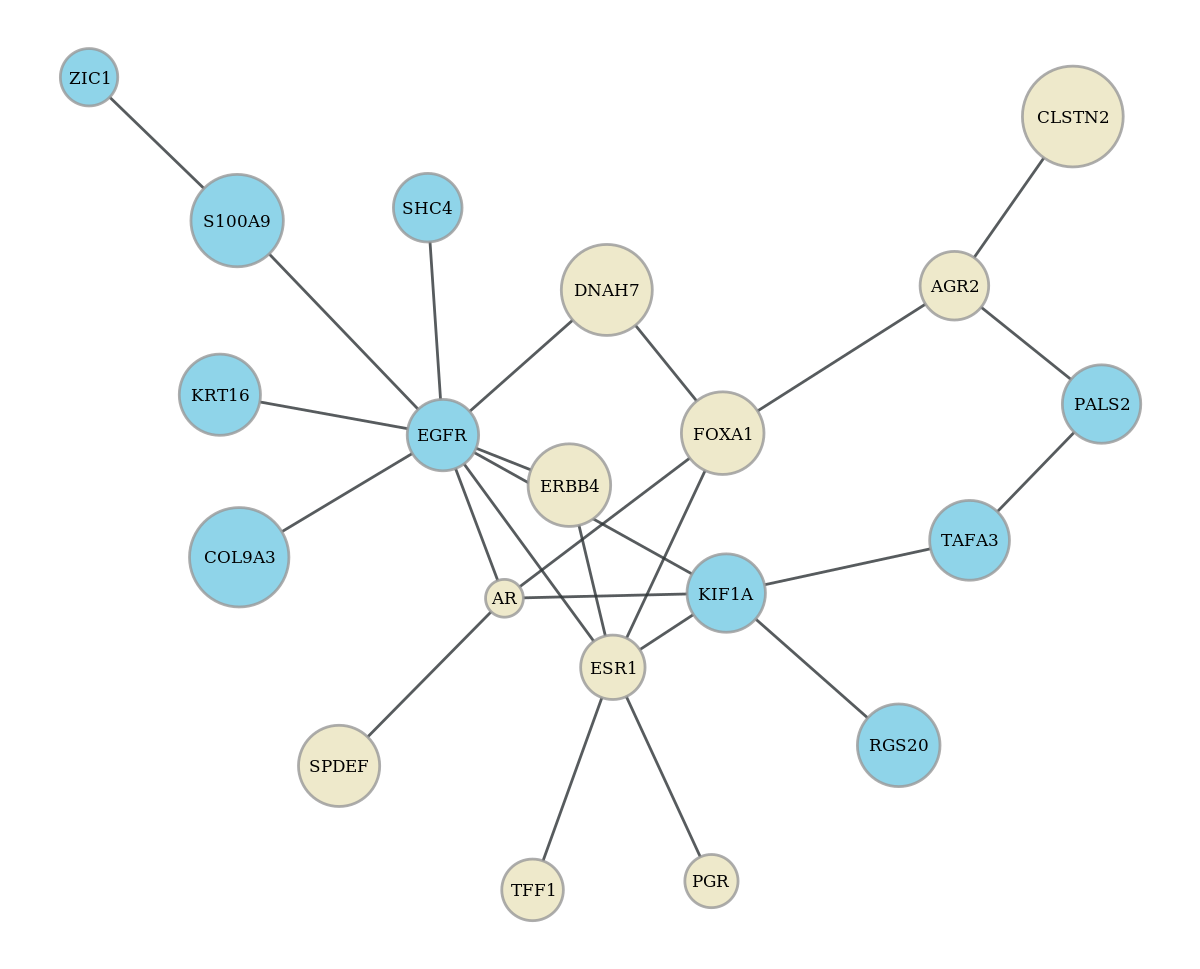

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f3fbe6e2eb0, at 0x7f3fbe9e6d90>

In [188]:
d.graph_draw(G, vertex_text=name, vertex_size=14, vertex_fill_color=cluster)#, output="graph_bicon.pdf")